# Getting Started

## Introduction

KinoML is a modular and extensible framework for machine learning in small molecule drug discovery. In this notebook you will learn how to install KinoML and how to train and test an ML model with a few lines of code.

For more extensive examples and tutorials have a look at the other notebooks in this [directory](https://github.com/openkinome/kinoml/tree/master/examples) or at the [experiments-binding-affnity](https://github.com/openkinome/experiments-binding-affinity) repository.

There is also a [documentation page](https://openkinome.org/kinoml/) for the KinoML repo, which allows browsing the API.

## Installation

KinoML can be easily installed using conda/mamba. We highly encourage using mamba instead of conda to speed up the installation.

```
mamba create -n kinoml --no-default-packages
mamba env update -n kinoml -f https://raw.githubusercontent.com/openkinome/kinoml/master/devtools/conda-envs/test_env.yaml
conda activate kinoml
pip install https://github.com/openkinome/kinoml/archive/master.tar.gz
```

## Basic example

KinoML has a strong focus on kinases, but can be applied to other proteins, if the appropriate code is written. However, the work on kinases is the easiest, since we provide cleaned kinase datasets for ChEMBL and PKIS2, which are hosted at the [kinodata](https://github.com/openkinome/kinodata) repository.

### DatasetProvider

These datasets can be easily ingested using the appropriate `DatasetProvider`.

In [1]:
%%capture --no-display
# to hide warnings
from kinoml.datasets.chembl import ChEMBLDatasetProvider

In [2]:
chembl_provider = ChEMBLDatasetProvider.from_source(
    measurement_types=["pIC50"],
    uniprot_ids=["P00533"],
    sample=1000,
)
chembl_provider

  0%|          | 0/1000 [00:00<?, ?it/s]

<ChEMBLDatasetProvider with 1000 measurements (pIC50Measurement=1000), and 986 systems (KLIFSKinase=1, Ligand=986)>

Just looking at the output, we can see that there appear to be some duplicates in the `measurements`. Let's have a look at the first measurement and the stored information.

In [3]:
chembl_provider.measurements[0]

<pIC50Measurement values=[5.13076828] conditions=<AssayConditions pH=7> system=<ProteinLigandComplex with 2 components (<KLIFSKinase name=P00533>, <Ligand name=OCCCCNc1cncc(-c2cncc(Nc3cccc(Cl)c3)n2)c1>)>>

In [4]:
chembl_provider.measurements[0].values

array([5.13076828])

In [5]:
chembl_provider.measurements[0].system

<ProteinLigandComplex with 2 components (<KLIFSKinase name=P00533>, <Ligand name=OCCCCNc1cncc(-c2cncc(Nc3cccc(Cl)c3)n2)c1>)>

In [6]:
chembl_provider.measurements[0].system.ligand

<Ligand name=OCCCCNc1cncc(-c2cncc(Nc3cccc(Cl)c3)n2)c1>

In [7]:
chembl_provider.measurements[0].system.protein

<KLIFSKinase name=P00533>

Each measurement comes with a `values` array representing the activity values for this measurement, which can be considered the typical `y` we want to predict in an ML experiment. The `system` object contains relevant information about `protein` and `ligand` for this measurement. The `system` information is typically `X` in an ML experiment, but is not yet in a machine-friendly format.

### Featurizer

To get the `X` in a machine-friendly format KinoML uses so called featurizers, which encode the information of each system. The `MorganFingerprintFeaturizer` for example will iterate over all `systems` and transform the `ligand` into a bit vector. All performed featurizations are commonly stored in the `featurizations` attribute of each system. The `last` performed featurization is stored additionally for easy access.

In [8]:
from kinoml.features.ligand import MorganFingerprintFeaturizer

In [9]:
%%capture --no-display
# to hide warnings
chembl_provider.featurize(MorganFingerprintFeaturizer())
chembl_provider.measurements[0].system.featurizations

{'last': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0

For more details on the KinoML object model have a look at the respective [notebook](https://github.com/openkinome/kinoml/blob/master/examples/kinoml_object_model.ipynb).

### ML training and testing

Now that we have `X` and `y`, we can run a small ML experiment. In this case, we will train a [support vector classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from sklearn. 

In [10]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [11]:
# get data from provider
X, y = chembl_provider.to_numpy()[0]
print(X[0])
print(y[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [12]:
# binarize activity values
y = (y > 7).astype(int)
print(y[0])

0


In [13]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# train the support vector classifier
svc = SVC(probability=True)
svc.fit(x_train, y_train)

SVC(probability=True)

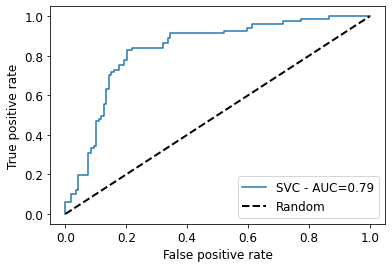

In [15]:
# get the ROC curve including AUC
y_test_pred = svc.predict(x_test)
svc_roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label=f'SVC - AUC={round(svc_roc_auc,2)}')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], linestyle='--', label='Random', lw=2, color="black")  # Random curve
plt.xlabel('False positive rate', size=12)
plt.ylabel('True positive rate', size=12)
plt.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.show()

For more advanced examples have a look at the [experiments-binding-affinity](https://github.com/openkinome/experiments-binding-affinity) repository.